<a href="https://colab.research.google.com/github/LingPeiYu/AaltoThesisDataAnalysis/blob/main/AaltoThesisDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Analysis

In [107]:
#Polynomial Regression Analysis
%config Completer.use_jedi = False # enable code auto-completion
import numpy as np #import numpy to work with arrays
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.preprocessing import PolynomialFeatures,normalize,MinMaxScaler # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression,LogisticRegression,HuberRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score # function to calculate mean squared error
from sklearn.model_selection import train_test_split

In [108]:
data=[]
data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))

#data process
for i in range(0,len(data)):
  data[i]['FailureCount']=data[i]['FailureCount']+1
  data[i]=data[i].rename(columns={'FailureCount': 'Attempt'})

TestData=data[0]
for i in range(1,len(data)):
  TestData=pd.concat([TestData,data[i]],axis=0)

# print the first 5 rows of the DataFrame 'RawData'
print(type(TestData))
#print how many rows in the 'RawData'
print(len(TestData))

print(TestData)

<class 'pandas.core.frame.DataFrame'>
60
    TestIndex  LevelIndex  Width  Length  ChessGroup  DataPieceCount  \
0           0           2     10      10       10023              10   
1           1          14     10      10        1102              10   
2           2           9     10      10          12              10   
3           3          16     10      10        2004              10   
4           4          18     10      10        2004              10   
5           5           6     10      10         404              10   
6           6          17     10      10        2004              10   
7           7           7     10      10         404              10   
8           8          12     10      10        1102              10   
9           9           5     10      10         404              10   
10         10           4     10      10         404              10   
11         11          15     10      10        1102              10   
12         12          

<ipython-input-108-6b9f6f9589b5>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-108-6b9f6f9589b5>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-108-6b9f6f9589b5>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))


In [109]:
TestData.columns

Index(['TestIndex', 'LevelIndex', 'Width', 'Length', 'ChessGroup',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'GenerationTime', 'Attempt', 'SuccessStep', 'PercivedDifficulty'],
      dtype='object')

In [110]:
TestData=TestData.assign(KingCount=TestData['ChessGroup']//100000)
TestData=TestData.assign(QueenCount=TestData['ChessGroup']%100000//10000)
TestData=TestData.assign(RookCount=TestData['ChessGroup']%10000//1000)
TestData=TestData.assign(BishopCount=TestData['ChessGroup']%1000//100)
TestData=TestData.assign(KnightCount=TestData['ChessGroup']%100//10)
TestData=TestData.assign(PawnCount=TestData['ChessGroup']%10//1)

print(type(TestData))

<class 'pandas.core.frame.DataFrame'>


In [111]:
TestData.columns

Index(['TestIndex', 'LevelIndex', 'Width', 'Length', 'ChessGroup',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'GenerationTime', 'Attempt', 'SuccessStep', 'PercivedDifficulty',
       'KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount',
       'PawnCount'],
      dtype='object')

In [112]:
TestData=TestData[['TestIndex', 'LevelIndex', 'Width', 'Length', 
       'KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'Attempt', 'SuccessStep', 'PercivedDifficulty']]
print(TestData)

    TestIndex  LevelIndex  Width  Length  KingCount  QueenCount  RookCount  \
0           0           2     10      10          0           1          0   
1           1          14     10      10          0           0          1   
2           2           9     10      10          0           0          0   
3           3          16     10      10          0           0          2   
4           4          18     10      10          0           0          2   
5           5           6     10      10          0           0          0   
6           6          17     10      10          0           0          2   
7           7           7     10      10          0           0          0   
8           8          12     10      10          0           0          1   
9           9           5     10      10          0           0          0   
10         10           4     10      10          0           0          0   
11         11          15     10      10          0           0 

In [113]:
scaler = MinMaxScaler()

#X=TestData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
#X['AIBestStep']=scaler.fit_transform(X[['AIBestStep']])
#X=X.to_numpy()
#y=TestData[['PercivedDifficulty']]
#y['PercivedDifficulty']=scaler.fit_transform(y[['PercivedDifficulty']])
#y=y.to_numpy()

#print(X)
#print(y)

#X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.5,random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.2,random_state=42)

lvIndexs=TestData[['LevelIndex']]
lvIndexs=np.unique(lvIndexs.to_numpy())

lv_train, lv_rem, lv_train, lv_rem = train_test_split(lvIndexs,lvIndexs,test_size=0.5,random_state=42)
lv_val, lv_test, lv_val, lv_test = train_test_split(lv_rem,lv_rem,test_size=0.2,random_state=42)

#process TestData
TestData['AIBestStep']=scaler.fit_transform(TestData[['AIBestStep']])
TestData['Attempt']=scaler.fit_transform(TestData[['Attempt']])
TestData['PercivedDifficulty']=scaler.fit_transform(TestData[['PercivedDifficulty']])

data_train=TestData[TestData['LevelIndex'].isin(lv_train.ravel())]
data_val=TestData[TestData['LevelIndex'].isin(lv_val.ravel())]
data_test=TestData[TestData['LevelIndex'].isin(lv_test.ravel())]

print(TestData)

#Get X
X_train=data_train[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
X_val=data_val[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
X_test=data_test[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()

#Get Y
y_train=data_train[['PercivedDifficulty']].to_numpy()
y_val=data_val[['PercivedDifficulty']].to_numpy()
y_test=data_test[['PercivedDifficulty']].to_numpy()


    TestIndex  LevelIndex  Width  Length  KingCount  QueenCount  RookCount  \
0           0           2     10      10          0           1          0   
1           1          14     10      10          0           0          1   
2           2           9     10      10          0           0          0   
3           3          16     10      10          0           0          2   
4           4          18     10      10          0           0          2   
5           5           6     10      10          0           0          0   
6           6          17     10      10          0           0          2   
7           7           7     10      10          0           0          0   
8           8          12     10      10          0           0          1   
9           9           5     10      10          0           0          0   
10         10           4     10      10          0           0          0   
11         11          15     10      10          0           0 

In [114]:
tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

[0.020345473983275488, 0.018416993469928856, 0.01790123456790124, 0.01790123456790123, 0.017901234567901235, 0.01790123456790125, 0.01790123456790115, 0.017901234567901048, 0.017901234567901037]
[0.0885847445194811, 0.39899922879796196, 0.27587889785643754, 0.9871431382642338, 3.6861867802944412, 14.112737667897866, 54.6319569236939, 212.81360759786094, 832.8753349170903]


<Figure size 800x2000 with 0 Axes>

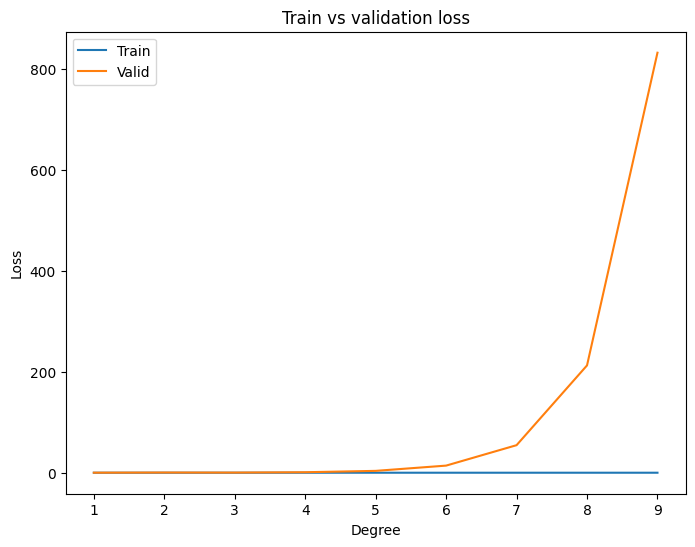

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,10), tr_errors, label = 'Train')
plt.plot(range(1,10), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [116]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regrPreDiff=LinearRegression(fit_intercept=False)
regrPreDiff.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regrPreDiff.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.09052083611834638


[0.010686350246404469, 0.009253498531829631, 0.009220751942869145, 0.009220751942869145, 0.009220751942869148, 0.00922075194286914, 0.009220751942869145, 0.00922075194286918, 0.00922075194286917]
[0.05290200953698516, 0.11240420168006415, 0.0788039902179507, 0.10307522014981745, 0.18332660418738678, 0.4605841555459693, 1.4729450219385969, 5.306443987496324, 20.140994168027188]


<Figure size 800x2000 with 0 Axes>

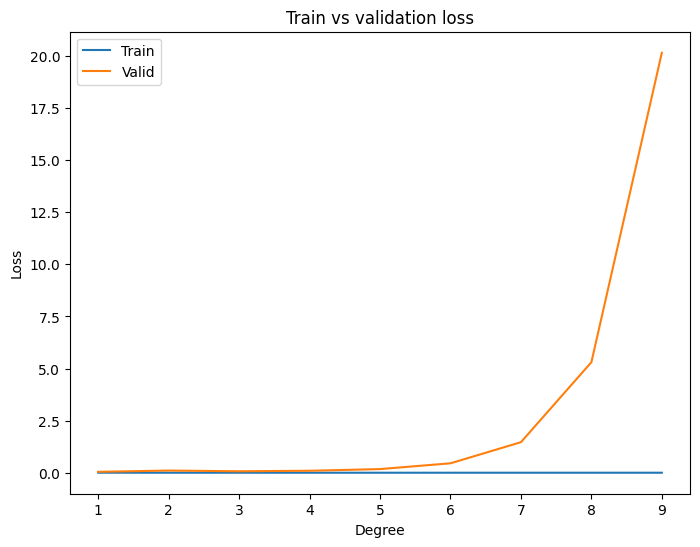

In [117]:
#Get Y
y_train=data_train[['Attempt']].to_numpy()
y_val=data_val[['Attempt']].to_numpy()
y_test=data_test[['Attempt']].to_numpy()

tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

plt.figure(figsize=(8, 6))
plt.plot(range(1,10), tr_errors, label = 'Train')
plt.plot(range(1,10), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [118]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regrAtt=LinearRegression(fit_intercept=False)
regrAtt.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regrAtt.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.004364221497806524


# Correlation Analysis

In [119]:
#Corr Analysis
import seaborn as sns

In [120]:
#sort each test's values by level index
#extract player's specific data
playerData=[]
for i in range(0,len(data)):
  p='Player'+str(i)
  playerData.append(
      data[i].rename(columns={'Attempt': p+'Attempt'}).rename(columns={'SuccessStep': p+'SuccessStep'}).rename(columns={'PercivedDifficulty': p+'PercivedDifficulty'})
      [['LevelIndex',p+'Attempt',p+'SuccessStep',p+'PercivedDifficulty']]
      )
  playerData[i]=playerData[i].sort_values(by='LevelIndex',ascending=True)

#sort level data
LevelData=TestData.drop_duplicates(subset='LevelIndex').sort_values(by='LevelIndex',ascending=True)
#print(LevelData)

    AIBestStep  Player0SuccessStep  Player1SuccessStep  Player2SuccessStep
0     0.000000            0.064516            0.000000            0.046512
1     0.259259            0.225806            0.977778            0.255814
2     0.777778            0.451613            0.755556            0.232558
3     1.000000            0.645161            0.355556            0.465116
4     0.111111            0.000000            0.133333            0.000000
5     0.444444            0.774194            1.000000            0.348837
6     0.629630            0.741935            0.422222            0.348837
7     0.962963            1.000000            0.577778            0.604651
8     0.148148            0.193548            0.044444            0.093023
9     0.518519            0.354839            0.577778            0.325581
10    0.666667            0.451613            0.444444            0.325581
11    0.962963            0.483871            0.288889            0.348837
12    0.148148           

<Axes: >

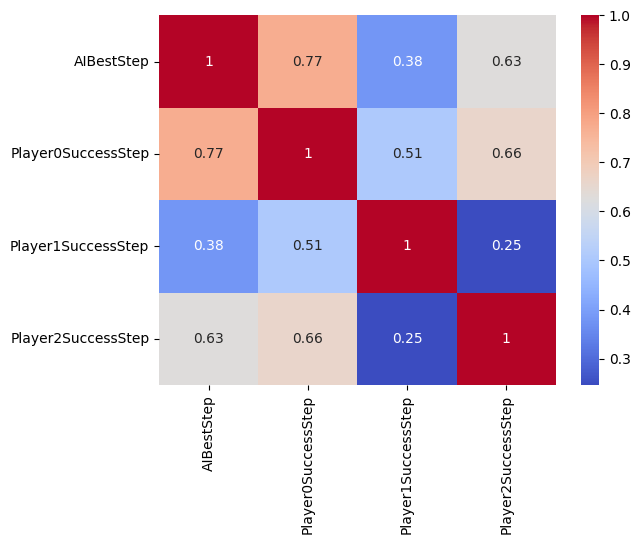

In [121]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'SuccessStep']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    AIBestStep  Player0PercivedDifficulty  Player1PercivedDifficulty  \
0     0.000000                          3                          2   
1     0.259259                          4                          3   
2     0.777778                          7                          6   
3     1.000000                          7                          5   
4     0.111111                          2                          4   
5     0.444444                          7                          6   
6     0.629630                          6                          3   
7     0.962963                          7                          5   
8     0.148148                          1                          1   
9     0.518519                          1                          2   
10    0.666667                          1                          2   
11    0.962963                          2                          2   
12    0.148148                          1                       

<Axes: >

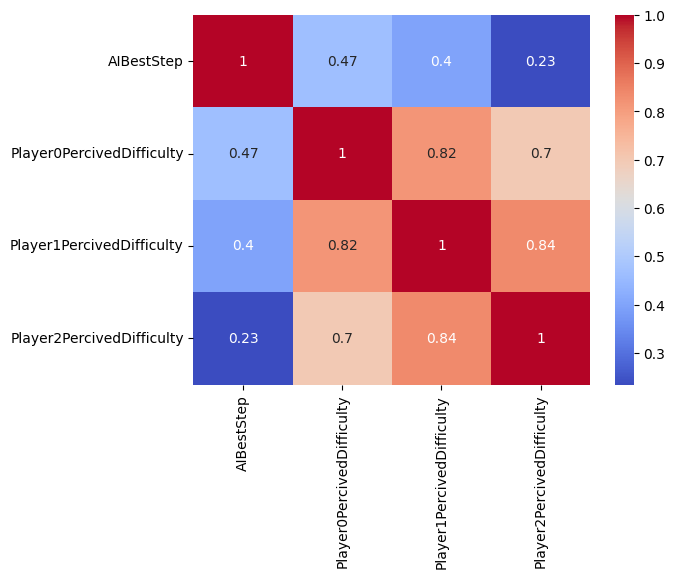

In [122]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'PercivedDifficulty']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

print(CorData)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    AIBestStep  Player0Attempt  Player1Attempt  Player2Attempt
0     0.000000              10               1               1
1     0.259259              12               2               1
2     0.777778              11               4               5
3     1.000000              26               9               1
4     0.111111               1               3               1
5     0.444444              47              15               2
6     0.629630              11               2               1
7     0.962963              31               5               4
8     0.148148               4               1               1
9     0.518519               1               1               2
10    0.666667               1               1               1
11    0.962963               1               1               1
12    0.148148               4               1               1
13    0.407407               1               1               2
14    0.666667               2               2         

<Axes: >

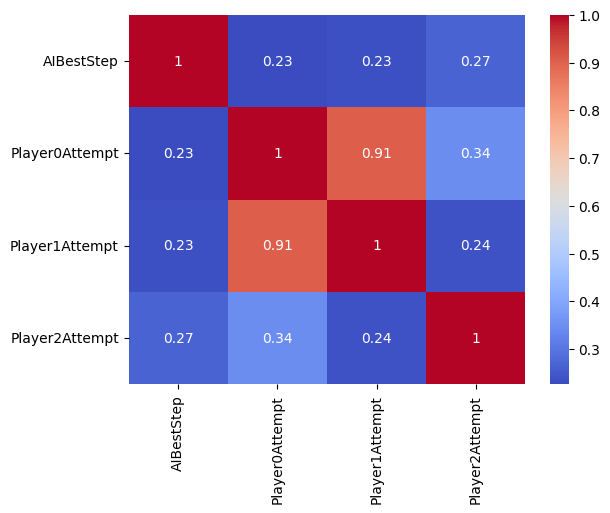

In [123]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'Attempt']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

print(CorData)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    PredictedDifficulty  LevelIndex
0              0.487742           0
1              0.639976           1
2              0.944444           2
3              1.074931           3
4              0.305852           4
5              0.501582           5
6              0.610320           6
7              0.806050           7
8             -0.149862           8
9              0.067616           9
10             0.154607          10
11             0.328588          11
12             0.107025          12
13             0.259259          13
14             0.411493          14
15             0.585475          15
16            -0.055753          16
17             0.139976          17
18             0.248715          18
19             0.444444          19
    PredictedDifficulty  Player0PercivedDifficulty  Player1PercivedDifficulty  \
0              0.487742                   0.333333                        0.2   
1              0.639976                   0.500000                        0.4   
2

<Axes: >

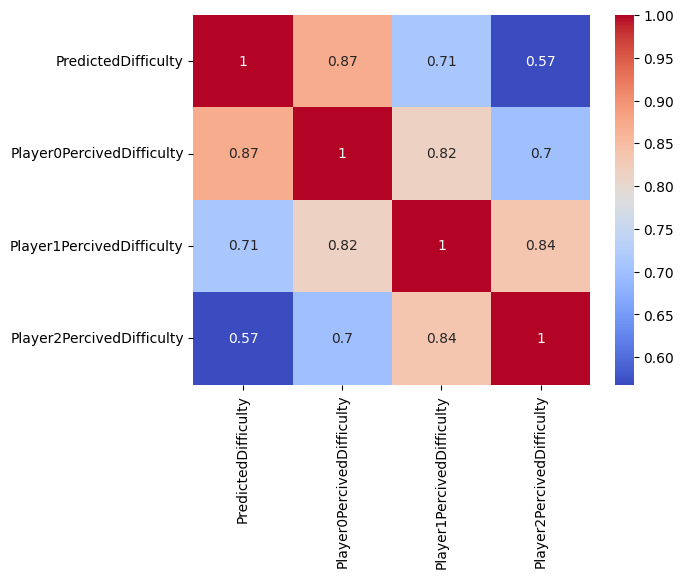

In [124]:
X=LevelData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrPreDiff.predict(X_poly)

CorData=pd.DataFrame(y_pred,columns=['PredictedDifficulty'])
CorData['LevelIndex']=range(0,LevelData.shape[0])
print(CorData)

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'PercivedDifficulty']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(1,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    PredictedAttempt  LevelIndex
0          -0.030881           0
1           0.020476           1
2           0.123188           2
3           0.167208           3
4           0.030288           4
5           0.096317           5
6           0.133001           6
7           0.199030           7
8          -0.084416           8
9          -0.011050           9
10          0.018296          10
11          0.076990          11
12         -0.036864          12
13          0.014493          13
14          0.065849          14
15          0.124542          15
16         -0.132511          16
17         -0.066481          17
18         -0.029798          18
19          0.036232          19
    PredictedAttempt  Player0Attempt  Player1Attempt  Player2Attempt
0          -0.030881        0.195652        0.000000            0.00
1           0.020476        0.239130        0.071429            0.00
2           0.123188        0.217391        0.214286            1.00
3           0.167208        0.5

<Axes: >

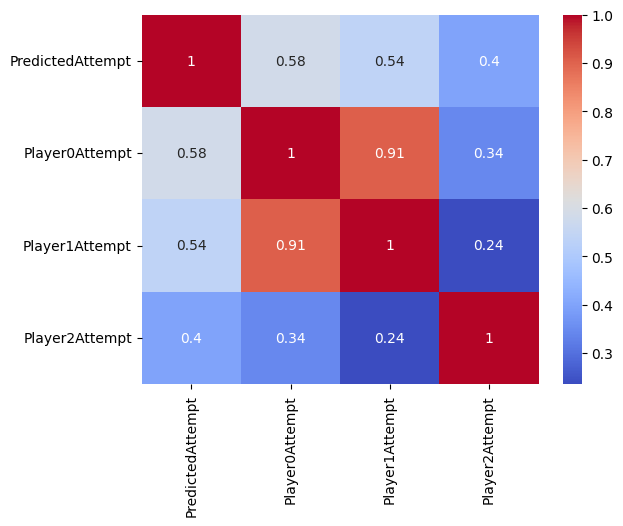

In [125]:
X=LevelData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrAtt.predict(X_poly)

CorData=pd.DataFrame(y_pred,columns=['PredictedAttempt'])
CorData['LevelIndex']=range(0,LevelData.shape[0])
print(CorData)

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'Attempt']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(1,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)